In [9]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from utils import read_models, plot_loss

Reading models from `cnn_models.json`:

In [10]:
data_dir = './Data/'

cnn_models = read_models(data_dir + 'cnn_models.json')

Defining variables for categories and spectra, performing one-hot encoding of categories and splitting sample into training and validation sets:

In [11]:
categories = cnn_models['category']
spectra = cnn_models['spectra']

cnn_categories = np.array([[0, 1] if category=='Quenched' else [1, 0] for category in categories])

X_train, X_test, y_train, y_test = train_test_split(spectra, cnn_categories, test_size=0.15, random_state=12)

Defining the CNN architecture:

In [17]:
model_cnn = keras.models.Sequential([
            keras.layers.Conv1D(16, kernel_size=9, padding="same", activation="relu", input_shape=(1857, 1)),
            keras.layers.Dropout(0.25),
            keras.layers.MaxPool1D(),
            keras.layers.Conv1D(32, kernel_size=3, padding="same", activation="relu"),
            keras.layers.Dropout(0.25),
            keras.layers.MaxPool1D(),
            keras.layers.Flatten(),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(2, activation="softmax")
])

model_cnn.compile(loss="binary_crossentropy", optimizer="SGD")

Defining early stopping callback with patience of 5:

In [13]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Performing training:

In [14]:
model_cnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=early_stopping, batch_size=200)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.6874 - val_loss: 0.6738
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.6598 - val_loss: 0.6432
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.6317 - val_loss: 0.6351
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.6098 - val_loss: 0.5861
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5808 - val_loss: 0.5528
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.5518 - val_loss: 0.5326
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5173 - val_loss: 0.4936
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.4800 - val_loss: 0.4683
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.5002 - val_loss: 0.4879
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.4383 - val_loss: 0.4107
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.4388 - val_loss: 0.4150
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

Plotting the history of the loss function:

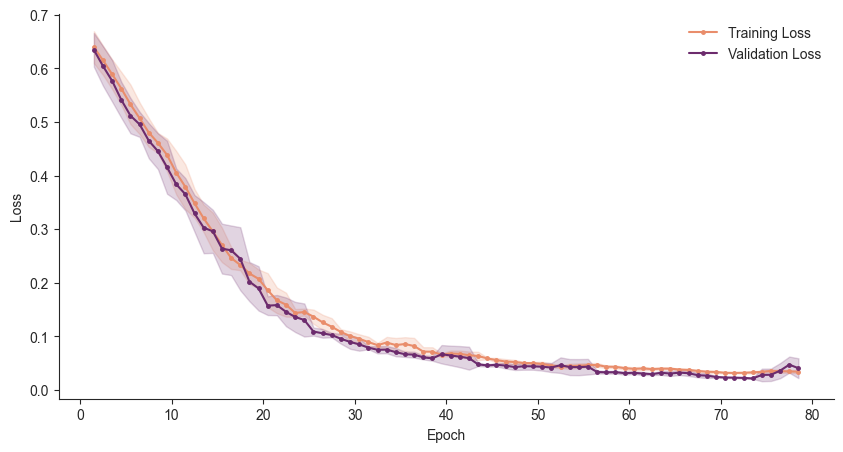

In [15]:
loss = model_cnn.history.history['loss']
val_loss = model_cnn.history.history['val_loss']

plot_loss(loss, val_loss)

Saving output model:

In [16]:
model_cnn.save(data_dir + 'model_cnn.keras')